# Trabalho Prático - Módulo 4

## Atividades (Enunciado)

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


### Importar a base de dados Fashion MNIST

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Descrição dos Rótulos das Imagens do DataSet

Label | Classe
:--------- | ---------:
0 | Camisetas/Top (T-shirt/top)
1 | Calça (Trouser)
2 | Suéter (Pullover)
3 | Vestidos (Dress)
4 | Casaco (Coat)
5 | Sandálias (Sandal)
6 | Camisas (Shirt)
7 | Tênis (Sneaker)
8 | Bolsa (Bag)
9 | Botas (Ankle boot)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # nomes dos rótulos em inglês

In [ ]:
# class_names = ['Camiseta/Top', 'Calças', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota'] # nomes dos rótulos em português

### Explore os dados

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

### Pré-processe os dados

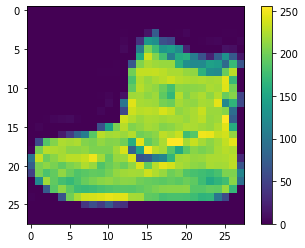

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

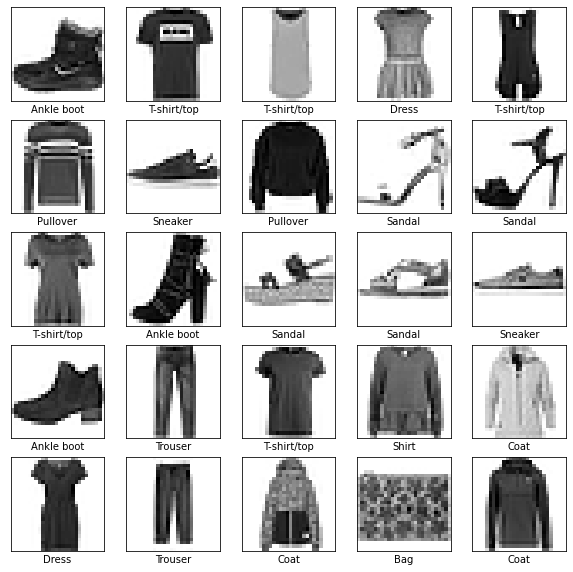

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # imagens
    plt.xlabel(class_names[train_labels[i]]) # nome do rótulo

plt.show()

### Construindo o modelo

#### Montar as camadas

In [ ]:
# Construindo a arquitetura e as camadas do modelo
model = keras.Sequential([ # camadas sequenciais
    keras.layers.Flatten(input_shape=(28, 28)), # camada 1: redimensiona os dados de entrada para uma dimensão de 28x28 = 784 pixels
    keras.layers.Dense(128, activation='relu'), # camada 2: completamente conectada de 128 neurônios 
    keras.layers.Dense(10, activation='softmax') # camada 3: retorna um array com 10 probabilidades, correspondentes às 10 classes existentes, cuja soma resulta em 1
])

#### Compile o modelo

In [ ]:
# Definindo as configurações do modelo
# Função Loss: perda de precisão durante o aprendizado
# Optimizer: otimização do modelo, em caso de perda
# Métricas: médições a serem avaliadas durante o aprendizado
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Treine o modelo

In [ ]:
# Ajustando o modelo com os dados de entrada
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4935 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3722 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2924 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2562 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

### Avalie a acurácia

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3251 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


### Faça predições

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.0869607e-09, 1.7740230e-07, 1.5778157e-09, 8.4248400e-11,
       4.7008814e-10, 7.0214985e-05, 9.4607607e-08, 1.1456587e-02,
       2.8994259e-08, 9.8847288e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

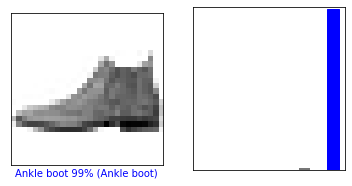

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

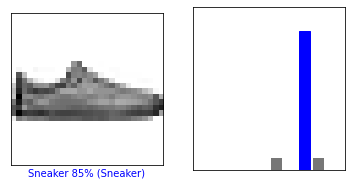

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

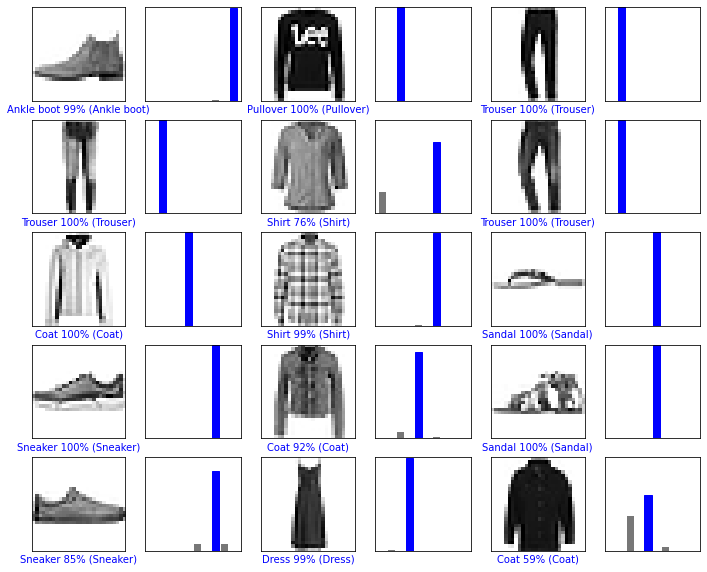

In [ ]:
# Plota os primeiros X imagens de teste, os rótulos preditos e os rótulos verdadeiros.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

img.shape

(28, 28)

In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img, 0))

img.shape

(1, 28, 28)

In [ ]:
predictions_single = model.predict(img)
predictions_single

array([[1.0869565e-09, 1.7740213e-07, 1.5778094e-09, 8.4248081e-11,
        4.7008630e-10, 7.0214781e-05, 9.4607252e-08, 1.1456566e-02,
        2.8994258e-08, 9.8847288e-01]], dtype=float32)

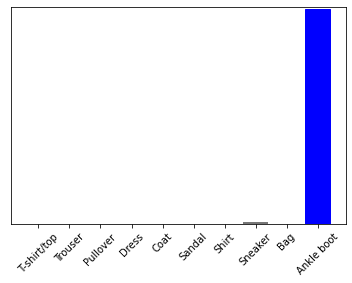

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

## Pergunta 1

Que tipo de Aprendizado foi utilizado no nosso problema?

R: Supervisionado.

In [ ]:
print('Variáveis (preditoras):', train_images)
print('Rótulos (respostas):', train_labels)

Variáveis (preditoras): [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ..

## Pergunta 2

No nosso exemplo executado, o modelo lida com quantas classes?

In [ ]:
len(np.unique(train_labels))

10

## Pergunta 3

Em Machine Learning, especificamente no reconhecimento de imagens características relacionadas à forma, normalmente são extraídas a partir da imagem binarizada do objeto. No nosso contexto, como os tipos de características de uma imagem podem ser identificados?

R: Pelos descritores de forma (Shape).

In [ ]:
train_images.shape # descrição da forma: 60000 imagens de 28x28 pixels

(60000, 28, 28)

## Pergunta 4

Em relação à análise de dados, o Machine Learning utiliza-se de uma forma. Qual seria essa forma?

R: Preditiva.

In [ ]:
img50 = test_images[50]
img50 = (np.expand_dims(img, 0))
model.predict(img50) # ML => forma preditiva

array([[1.0869565e-09, 1.7740213e-07, 1.5778094e-09, 8.4248081e-11,
        4.7008630e-10, 7.0214781e-05, 9.4607252e-08, 1.1456566e-02,
        2.8994258e-08, 9.8847288e-01]], dtype=float32)

## Pergunta 5

Pensando no conceito de Inteligência Artificial, podemos dizer que:

R: O sistema montado tenta pensar como humanos.

## Pergunta 6

O desempenho do sistema deve melhorar não apenas na repetição da mesma tarefa, mas também nas tarefas similares do domínio. Portanto:

R: O aprendizado envolve a generalização a partir da experiência. 

In [ ]:
# Medindo perda e acurácia dos dados de teste: availiação de generalização do modelo com base nos dados (experiência)
metricas_treino = model.evaluate(train_images, train_labels, verbose=2)
metricas_teste = model.evaluate(test_images, test_labels, verbose=2)

1875/1875 - 2s - loss: 0.2191 - accuracy: 0.9183
313/313 - 0s - loss: 0.3251 - accuracy: 0.8841


## Pergunta 7

Inferência é uma dedução feita com base em informações ou um raciocínio que usa dados disponíveis para se chegar a uma conclusão. O nosso exemplo utilizou-se de qual tipo de inferência?

In [ ]:
poder_generalizacao = metricas_treino[1] - metricas_teste[1] # medindo o poder de generalização ou inferência indutiva do modelo 

## Pergunta 8

Qual dessas técnicas NÃO poderia ser utilizada para classificação?

R: Regressão linear.

In [ ]:
# Classificação
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Regressão
from sklearn.linear_model import LinearRegression

## Pergunta 9

Pelo uso da etapa de Flatten, podemos afirmar qual a rede neural foi utilizada dentre as opções abaixo?

R: Sim, podemos dizer que foi uma Rede Neural CNN. (gabarito do trabalho)

R: Sim, podemos dizer que foi a forma simples de um Perceptron duas camadas. (resposta correta)

**[Texto retirado do notebook da segunda aula interativa do módulo 2]**:

### Introdução

Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Aprendizado Profundo (Deep Learning) que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que podem ser aprendidos) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro. O pré-processamento exigido em uma CNN é muito menor em comparação com outros algoritmos de classificação. Enquanto nos métodos primitivos os filtros são feitos à mão, com treinamento suficiente, as CNNs têm a capacidade de aprender esses filtros / características.

#### Por que não usar redes MLPs?

Uma imagem não é nada além de uma matriz de valores de pixels, não é mesmo? **<u>Então, por que não podemos apenas achatar a imagem (por exemplo, converter uma matriz 3×3 em um vetor 9×1) e alimentá-lo em uma rede MLP para fins de classificação?</u>**

Uma CNN é capaz de capturar com sucesso as dependências espaciais e temporais em uma imagem através da aplicação de filtros relevantes. A arquitetura executa um melhor ajuste ao conjunto de dados da imagem devido à redução no número de parâmetros envolvidos e à capacidade de reutilização dos pesos. Em outras palavras, a rede pode ser treinada para entender melhor a sofisticação da imagem. Coisa que uma rede MLP tradicional não consegue.

## Pergunta 10

Para que serviu a função Loss no nosso modelo?

R: Serve para minimizar a função de perda para guiar o modelo para direção certa.

In [ ]:
numero_epocas = len(history.history['loss'])
for i, loss_i in enumerate(history.history['loss']):
    print(f'Época {i + 1}/{numero_epocas}: {loss_i}')

Época 1/10: 0.4934781491756439
Época 2/10: 0.3721643090248108
Época 3/10: 0.33474454283714294
Época 4/10: 0.31172868609428406
Época 5/10: 0.29242080450057983
Época 6/10: 0.2778433561325073
Época 7/10: 0.266294926404953
Época 8/10: 0.25616034865379333
Época 9/10: 0.24582116305828094
Época 10/10: 0.237196683883667


## Pergunta 11

Para que serve o comando model.fit?

R: Treinamento.

In [ ]:
import pydoc

doc_comando_fit = pydoc.render_doc(model.fit, renderer=pydoc.plaintext).split('\n')
descricao_comando_fit = doc_comando_fit[3].strip()

descricao_comando_fit

'Trains the model for a fixed number of epochs (iterations on a dataset).'

## Pergunta 12

O que seria uma Epoch?

R: Seria o número de passagens de todo o conjunto de dados de treinamento que o algoritmo de aprendizado de máquina concluiu.

In [ ]:
import pydoc

doc_comando_fit = pydoc.render_doc(model.fit, renderer=pydoc.plaintext).split('\n')

for linha in doc_comando_fit:
    if 'epochs' in linha:
        print(linha)

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
        epochs: Integer. Number of epochs to train the model.
            `epochs` is to be understood as "final epoch".
            given by `epochs`, but merely until the epoch
            of index `epochs` is reached.
            If an integer, specifies how many training epochs to run before a
            validation every 2 epochs. If a Container, specifies the epochs on
            validation at the end of the 1st, 2nd, and 10th epochs.
        at successive epochs, as well as validation loss values


## Pergunta 13

No treinamento do modelo, qual foi a acurácia aproximada da Epoch 5/10?

R: 0,8914. (resposta mais próxima)

In [ ]:
epoca = 5

history.history['accuracy'][epoca - 1]

0.8925666809082031

## Pergunta 14

Quantas imagens foram utilizadas para predições de imagens em batch?

R: Todo o conjunto de teste chamado “test_images”.

In [ ]:
predictions = model.predict(test_images)

len(test_images)

10000

## Pergunta 15

Qual foi o resultado da classificação da única imagem ao final? Foi correta?

In [ ]:
np.argmax(predictions_single[0])

9